Lambda School Data Science

*Unit 4, Sprint 1, Module 3*

---

# Document Classification (Assignment)

This notebook is for you to practice skills during lecture.

Today's guided module project and assignment will be different. You already know how to do classification. You ready know how to extract features from documents. So? That means you're ready to combine and practice those skills in a kaggle competition. We we will open with a five minute sprint explaining the competition, and then give you 25 minutes to work. After those twenty five minutes are up, I will give a 5-minute demo an NLP technique that will help you with document classification (*and **maybe** the competition*).

Today's all about having fun and practicing your skills.

## Sections
* <a href="#p1">Part 1</a>: Text Feature Extraction & Classification Pipelines
* <a href="#p2">Part 2</a>: Latent Semantic Indexing
* <a href="#p3">Part 3</a>: Word Embeddings with Spacy
* <a href="#p4">Part 4</a>: Post Lecture Assignment

# Text Feature Extraction & Classification Pipelines (Learn)
<a id="p1"></a>

## Follow Along 

What you should be doing now:
1. Join the Kaggle Competition
2. Download the data
3. Train a model (try using the pipe method I just demoed)

### Load Competition Data

In [1]:
import pandas as pd

# You may need to change the path
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [2]:
train.head()

,id,description,ratingCategory
0,1321,"\nSometimes, when whisky is batched, a few lef...",1
1,3861,\nAn uncommon exclusive bottling of a 6 year o...,0
2,655,\nThis release is a port version of Amrut’s In...,1
3,555,\nThis 41 year old single cask was aged in a s...,1
4,1965,"\nQuite herbal on the nose, with aromas of dri...",1


In [44]:
from sklearn.utils import resample

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
minority = train[train['ratingCategory'] == 0]
majority = train[train['ratingCategory'] == 1]
df_minority_upsampled = resample(minority,
                                 replace=True,
                                 n_samples=majority.shape[0]
                                )
df_upsampled = pd.concat([majority, df_minority_upsampled])

In [45]:
df_upsampled.head()

,id,description,ratingCategory
0,1321,"\nSometimes, when whisky is batched, a few lef...",1
2,655,\nThis release is a port version of Amrut’s In...,1
3,555,\nThis 41 year old single cask was aged in a s...,1
4,1965,"\nQuite herbal on the nose, with aromas of dri...",1
5,3190,\nCooley produced some great Irish single malt...,1


In [241]:
def line_br_removal(df_upsampled):
    df_upsampled['description'] = df_upsampled['description'].str.strip('\n')
    return df_upsampled

line_br_removal(train)

,id,description,ratingCategory,tokens
0,1321,"Sometimes, when whisky is batched, a few lefto...",1,"[\n, sometimes,, whisky, batched,, leftover, b..."
1,3861,An uncommon exclusive bottling of a 6 year old...,0,"[\n, uncommon, exclusive, bottling, year, old,..."
2,655,This release is a port version of Amrut’s Inte...,1,"[\n, release, port, version, amrut’s, intermed..."
3,555,This 41 year old single cask was aged in a she...,1,"[\n, year, old, single, cask, aged, sherry, bu..."
4,1965,"Quite herbal on the nose, with aromas of dried...",1,"[\n, herbal, nose,, aromas, dried, tarragon,, ..."
...,...,...,...,...
4082,3342,What lies beneath the surface of Dewar’s? Here...,1,"[\n, lies, beneath, surface, dewar’s?, here,, ..."
4083,3130,After 6 to 7 years of maturation in bourbon ca...,1,"[\n, years, maturation, bourbon, casks,, spent..."
4084,2811,"Bright, delicate, and approachable. While not ...",1,"[\n, bright,, delicate,, approachable., showst..."
4085,478,I’m calling this the pitmaster’s dram: the nos...,1,"[\n, i’m, calling, pitmaster’s, dram:, nose, m..."


### Define Pipeline Components

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
clf = RandomForestClassifier()

pipe = Pipeline([('vect', vect), ('clf', clf)])

### Define Your Search Space
You're looking for both the best hyperparameters of your vectorizer and your classification model. 

In [46]:
parameters = {
    'vect__max_df': (0.75, 1.0),
    'clf__max_depth':(5,10,15,20)
}

grid_search = GridSearchCV(pipe,parameters, cv=7, n_jobs=5, verbose=1)
grid_search.fit(train['description'], train['ratingCategory'])

Fitting 7 folds for each of 8 candidates, totalling 56 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed: 10.6min
[Parallel(n_jobs=5)]: Done  56 out of  56 | elapsed: 15.6min finished


GridSearchCV(cv=7, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 2),
                                                        no

In [58]:
grid_search.best_params_

{'clf__max_depth': 20, 'vect__max_df': 1.0}

### Make a Submission File
*Note:* In a typical Kaggle competition, you are only allowed two submissions a day, so you only submit if you feel you cannot achieve higher test accuracy. For this competition the max daily submissions are capped at **20**. Submit for each demo and for your assignment. 

In [7]:
# Predictions on test sample
pred = grid_search.predict(test['description'])

In [8]:
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [9]:
# Make Sure the Category is an Integer
submission.head()

,id,ratingCategory
0,3461,1
1,2604,1
2,3341,1
3,3764,1
4,2306,1


In [10]:
subNumber = 0

In [12]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'submission1.csv', index=False)
subNumber += 1

## Challenge

You're trying to achieve a minimum of 70% Accuracy on your model.

## Latent Semantic Indexing (Learn)
<a id="p2"></a>

## Follow Along
1. Join the Kaggle Competition
2. Download the data
3. Train a model & try: 
    - Creating a Text Extraction & Classification Pipeline
    - Tune the pipeline with a `GridSearchCV` or `RandomizedSearchCV`
    - Add some Latent Semantic Indexing (lsi) into your pipeline. *Note:* You can grid search a nested pipeline, but you have to use double underscores ie `lsi__svd__n_components`
4. Make a submission to Kaggle 


### Define Pipeline Components

In [184]:
import scipy.stats as stats
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

### Define Your Search Space
You're looking for both the best hyperparameters of your vectorizer and your classification model. 

In [284]:
svd = TruncatedSVD(n_components=100,
                   algorithm='randomized',
                   n_iter=10)
vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
clf = RandomForestClassifier(n_estimators=100, 
                             random_state=20, 
                             max_features = 'sqrt',
                             n_jobs=-1, verbose=1)
params = { 
    'lsi__svd__n_components': stats.randint(90, 250),
    'lsi__vect__max_df': stats.uniform(0.9, 1.0),
    'clf__n_estimators': stats.randint(15, 20),
    'clf__max_depth': (5, 10, 15, 20)
}

lsi = Pipeline([('vect', vect), ('svd', svd)])
pipe = Pipeline([('lsi', lsi), ('clf', clf)])

In [117]:
random_search = RandomizedSearchCV(
    pipe, params, cv=5, n_jobs=-1, verbose=10, random_state=42)
random_search.fit(train['description'], train['ratingCategory']) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 13.8min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('lsi',
                                              Pipeline(memory=None,
                                                       steps=[('vect',
                                                               TfidfVectorizer(analyzer='word',
                                                                               binary=False,
                                                                               decode_error='strict',
                                                                               dtype=<class 'numpy.float64'>,
                                                                               encoding='utf-8',
                                                                               input='content',
                                                                               lowercase=True,
                          

In [144]:
random_search.best_params_

{'clf__max_depth': 20,
 'lsi__svd__n_components': 110,
 'lsi__vect__max_df': 1.5174815096277166}

In [242]:
vect.get_params().keys()

dict_keys(['analyzer', 'binary', 'decode_error', 'dtype', 'encoding', 'input', 'lowercase', 'max_df', 'max_features', 'min_df', 'ngram_range', 'norm', 'preprocessor', 'smooth_idf', 'stop_words', 'strip_accents', 'sublinear_tf', 'token_pattern', 'tokenizer', 'use_idf', 'vocabulary'])

In [243]:
from collections import Counter

def count(docs):
    word_counts = Counter()
    appears_in = Counter()
        
    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())
        
    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
    return wc.sort_values(by='rank')

In [244]:
STOP_WORDS = nlp.Defaults.stop_words

In [245]:
doc = nlp(str(train['description']))
from spacy.tokenizer import Tokenizer

tokenizer = Tokenizer(nlp.vocab)

tokens = []

for doc in tokenizer.pipe(train['description'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.text.lower() not in STOP_WORDS) & (token.is_digit is False) & (token.is_punct is False):
            doc_tokens.append(token.text.lower())
            
    tokens.append(doc_tokens)

train['tokens'] = tokens
train.head()

,id,description,ratingCategory,tokens
0,1321,"Sometimes, when whisky is batched, a few lefto...",1,"[sometimes,, whisky, batched,, leftover, barre..."
1,3861,An uncommon exclusive bottling of a 6 year old...,0,"[uncommon, exclusive, bottling, year, old, cas..."
2,655,This release is a port version of Amrut’s Inte...,1,"[release, port, version, amrut’s, intermediate..."
3,555,This 41 year old single cask was aged in a she...,1,"[year, old, single, cask, aged, sherry, butt, ..."
4,1965,"Quite herbal on the nose, with aromas of dried...",1,"[herbal, nose,, aromas, dried, tarragon,, pars..."


In [246]:
word_count = count(train.tokens)
word_count.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
64,sweet,1145,1339,1.0,0.007430,0.007430,0.280157
281,notes,1014,1152,2.0,0.006393,0.013823,0.248104
19,oak,932,1147,3.0,0.006365,0.020188,0.228040
212,finish.,1101,1116,4.0,0.006193,0.026381,0.269391
75,finish,1090,1111,5.0,0.006165,0.032546,0.266699


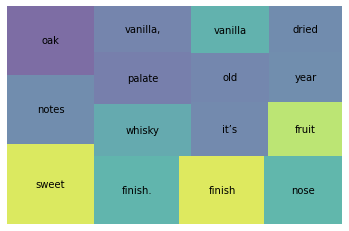

In [247]:
import squarify
import matplotlib.pyplot as plt

wc_top15 = word_count[word_count['rank'] <=15]

squarify.plot(sizes=wc_top15['pct_total'], label=wc_top15['word'], alpha=.7)
plt.axis('off')
plt.show()

In [248]:
line_br_removal(test)

,id,description,ratingCategory
0,3461,Style: Speyside single malt scotch Color: Waln...,1
1,2604,"Very bright and lively, with a nice balance of...",1
2,3341,A new oloroso-forward Chivas positioned to spl...,1
3,3764,Aged in bourbon casks and then enhanced in Rio...,1
4,2306,"There is a freshness to the wood on the nose, ...",1
...,...,...,...
1017,2853,"Care for a small batch, bourbon-matured blend ...",1
1018,219,"This is the pick of the bunch, the whisky equi...",1
1019,1286,"Port Ellen, for sure! Very old-fashioned in na...",1
1020,2201,"Youthful and very lively. Bold, crisp, spices ...",1


### Make a Submission File

In [ ]:
# Predictions on test sample
pred = grid_search.predict(test['description'])

In [ ]:
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [ ]:
# Make Sure the Category is an Integer
submission.head()

In [ ]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'./data/submission{subNumber}.csv', index=False)
subNumber += 1

## Challenge

Continue to apply Latent Semantic Indexing (LSI) to various datasets. 

# Word Embeddings with Spacy (Learn)
<a id="p3"></a>

## Follow Along

In [249]:
# Apply to your Dataset
import spacy

nlp = spacy.load("en_core_web_lg")

In [250]:
# Continue Word Embedding Work Here
def get_word_vectors(docs):
    return [nlp(doc).vector for doc in docs]

In [276]:
X = get_word_vectors(train['description'])
len(X) == len(train['description'])

True

In [277]:
X_test = get_word_vectors(test['description'])

In [285]:
clf.fit(X, train['ratingCategory'])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.6s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=20, verbose=1,
                       warm_start=False)

In [286]:
test['ratingCategory'] = clf.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [287]:
clf.score(X, train['ratingCategory'])

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


1.0

### Make a Submission File

In [75]:
# Predictions on test sample
pred_ = clf.predict(X_test)

In [76]:
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred_})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [121]:
# Make Sure the Category is an Integer
print(submission.shape)
submission.head()

(1022, 2)


,id,ratingCategory
0,3461,1
1,2604,0
2,3341,1
3,3764,1
4,2306,1


In [78]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'submission4.csv', index=False)
subNumber += 4

## Challenge

What you should be doing now:
1. Join the Kaggle Competition
2. Download the data
3. Train a model & try: 
    - Creating a Text Extraction & Classification Pipeline
    - Tune the pipeline with a `GridSearchCV` or `RandomizedSearchCV`
    - Add some Latent Semantic Indexing (lsi) into your pipeline. *Note:* You can grid search a nested pipeline, but you have to use double underscores ie `lsi__svd__n_components`
    - Try to extract word embeddings with Spacy and use those embeddings as your features for a classification model.
4. Make a submission to Kaggle 

# Post Lecture Assignment
<a id="p4"></a>

Your primary assignment this afternoon is to achieve a minimum of 70% accuracy on the Kaggle competition. Once you have achieved 70% accuracy, please work on the following: 

1. Research "Sentiment Analysis". Provide answers in markdown to the following questions: 
    - What is "Sentiment Analysis"? 
    Sentiment analysis refers to the use of NLP, text analysis, computational linguistics, and biometrics to systematically
    identify, extract, quantify, and study affective states and subjective information.
    - Is Document Classification different than "Sentiment Analysis"? Provide evidence for your response
    - How do create labeled sentiment data? Are those labels really sentiment?
    - What are common applications of sentiment analysis?
2. Research our why word embeddings worked better for the lecture notebook than on the whiskey competition.
    - This [text classification documentation](https://developers.google.com/machine-learning/guides/text-classification/step-2-5) from Google might be of interest
    - Neural Networks are becoming more popular for document classification. Why is that the case?